In [2]:
# imports & file initialization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./bank.csv')

### A. Formulate a particular question that might be interesting to answer by exploring this dataset.
Question: What is the spread of loans across the job types?

### B.1. Calculate statistics for the numberical attributes. 

In [9]:
# General stastics 

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


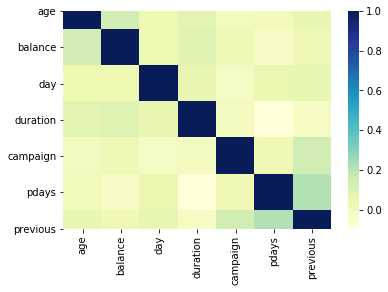

In [30]:
# Correlation matrix of numberical attributes

sns.heatmap(df.corr(), cmap="YlGnBu");

Strongest correlation appears to be between pdays and previous. 

pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means no contact)
previous: number of contacts performed before this campaign and for this client (numeric)

Further investigation using a pair plot:

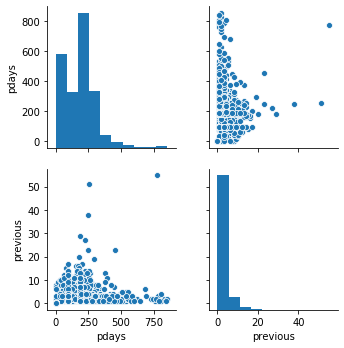

In [10]:
sns.pairplot(data=df[['pdays','previous']].dropna())
plt.show()

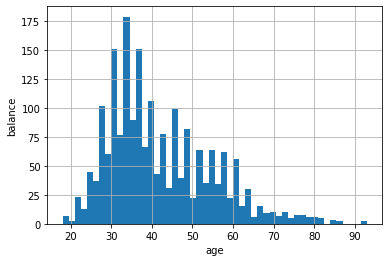

In [18]:
# Distribution analysis age v balance

df['age'].hist(bins=50)
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

We can see that people in the 30-40 year old age group have the highest balance

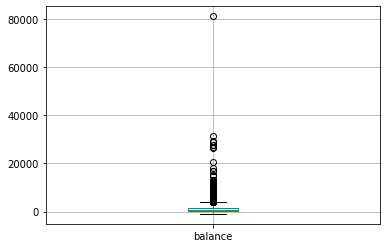

In [16]:
# Boxplot of balance

df.boxplot(column='balance')
plt.show()

The balance of most people is quite low but with a lot of outliers

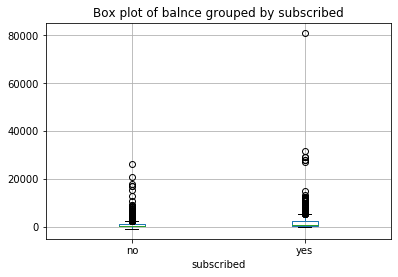

In [12]:
# Boxplot of balance, grouped by subscribed (categorical)

df.boxplot(column='balance', by='subscribed')
plt.title('Box plot of balance grouped by subscribed')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

Peoples with higher balances are more likely to be subscribed but the difference is very little

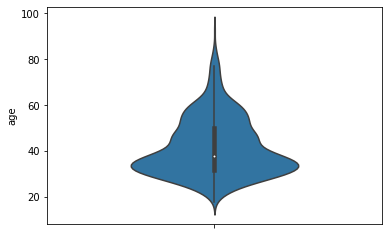

In [27]:
# Violin plot of age

sns.violinplot(x=df['age'], orient='v', width=0.5)
plt.show()

The majproty of people are in the 30-40 year age bracket

### B.2. Calculate statistics for the categorical attributes

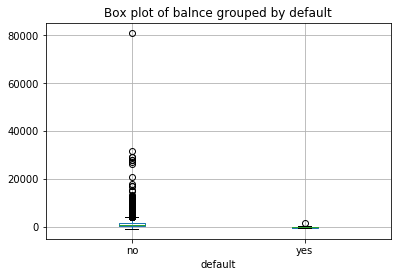

In [13]:
# Boxplot of balance, grouped by default (categorical)

df.boxplot(column='balance', by='default')
plt.title('Box plot of balance grouped by default')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

Almost all the outliers in terms of balance have not defaulted on previous loans. People who have defaulted in general have a marginally lower balance than those who have not

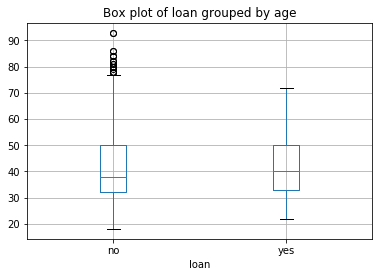

In [16]:
# Boxplot of age, grouped by loan (categorical)

df.boxplot(column='age', by='loan')
plt.title('Box plot of loan grouped by age')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

Age doesn't appear to be a factor in if a person has a loan or not. However, all of the oldest people do not have a loan.

In [15]:
# Frequency table for job

df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [3]:
# Pivot table of job type and loan status

pivot_table_LC = df.pivot_table(values='loan',
                                index='job',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_LC)

                   loan
job                    
admin.         0.141700
blue-collar    0.144295
entrepreneur   0.222222
housemaid      0.028571
management     0.108460
retired        0.086420
self-employed  0.125000
services       0.169697
student        0.000000
technician     0.155172
unemployed     0.101449


Entrepreneurs are most likely to have a loan but it's not clear if this is a buisness loan or a personal loan. Surprisngly no students have a loan.

In [4]:
# Pivot table of job type and campaign outcome

pivot_table_LC = df.pivot_table(values='poutcome',
                                index='job',
                                aggfunc=lambda x: x.map({'success':1, 'failure':0}).mean())
print(pivot_table_LC)

               poutcome
job                    
admin.         0.322034
blue-collar    0.192308
entrepreneur   0.181818
housemaid      0.280000
management     0.344512
retired        0.598214
self-employed  0.333333
services       0.222222
student        0.565217
technician     0.237154
unemployed     0.500000


The previous marketing campaign was very sucessful with those who were retired, students and unemployed. Perhaps this is an indication that the campain was aimed at those on low or non existant incomes

In [5]:
# Pivot table of job type and housing

pivot_table_LC = df.pivot_table(values='housing',
                                index='job',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_LC)

                housing
job                    
admin.         0.538462
blue-collar    0.728188
entrepreneur   0.444444
housemaid      0.342857
management     0.442516
retired        0.172840
self-employed  0.453125
services       0.618182
student        0.104167
technician     0.543103
unemployed     0.246377


No surprises that students are least likely to have a house loan. Same goes for retired as it indicates they have their mortgages paid off by the time they are retired

In [7]:
# Pivot table of job type and default

pivot_table_LC = df.pivot_table(values='default',
                                index='job',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_LC)

                default
job                    
admin.         0.004049
blue-collar    0.016779
entrepreneur   0.000000
housemaid      0.000000
management     0.013015
retired        0.006173
self-employed  0.015625
services       0.000000
student        0.000000
technician     0.000000
unemployed     0.014493


There does seem to be any correlation between your job type and weather or not you have defaulted on a loan.